Data Loaded Successfully!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction  

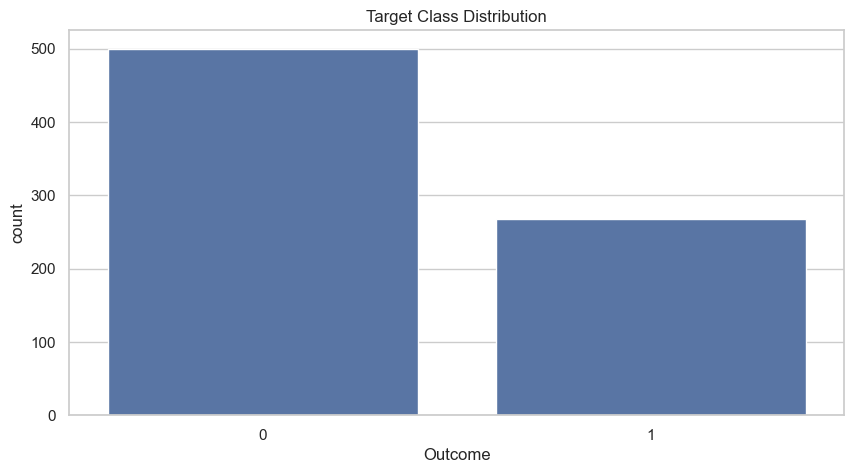

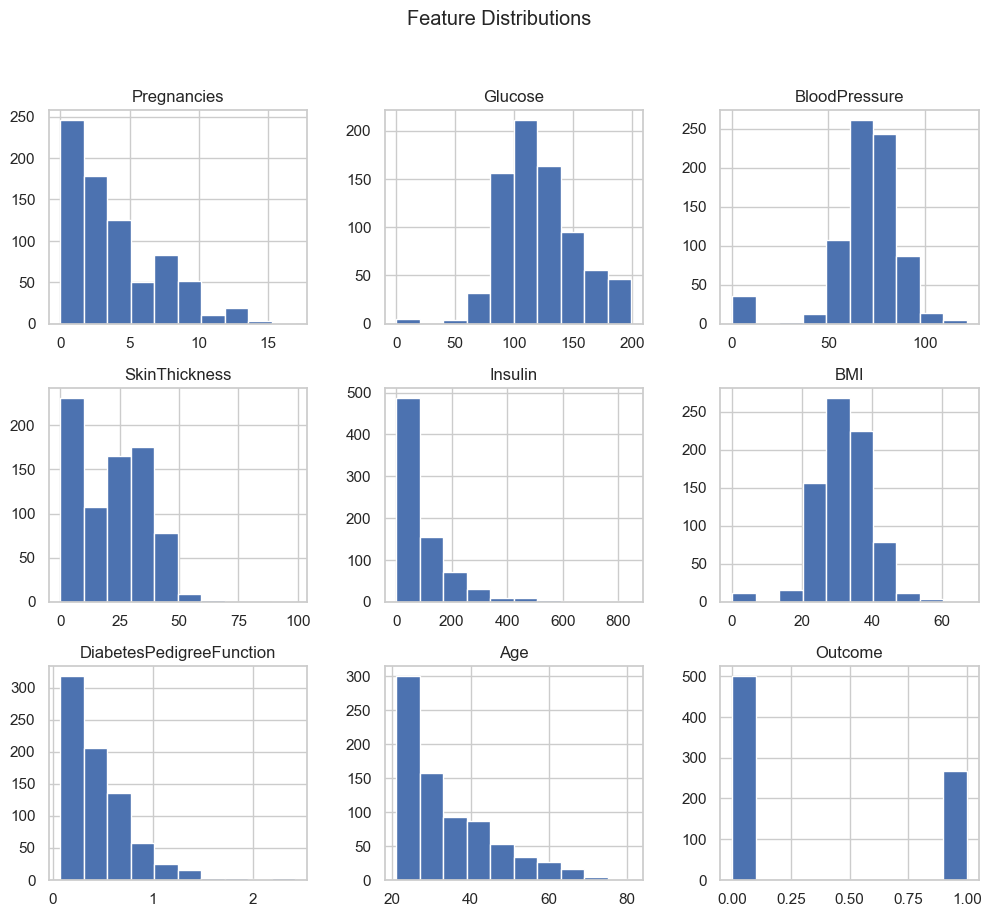

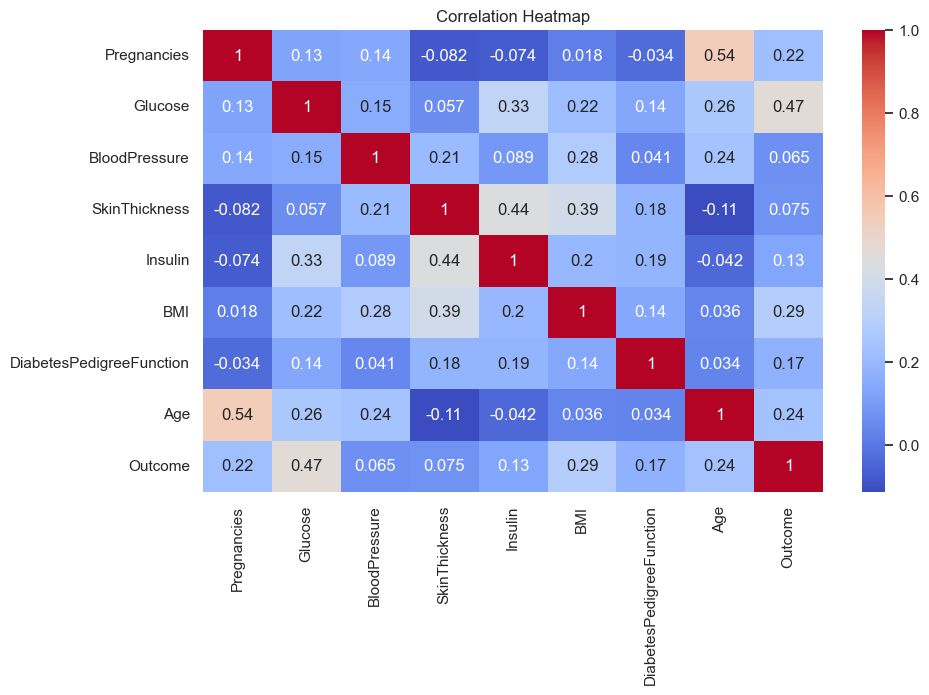

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

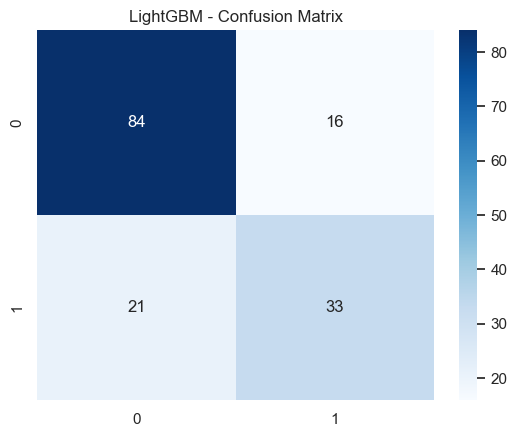


===== XGBoost =====
Accuracy : 0.7337662337662337
Precision: 0.6226415094339622
Recall   : 0.6111111111111112
F1 Score : 0.616822429906542

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



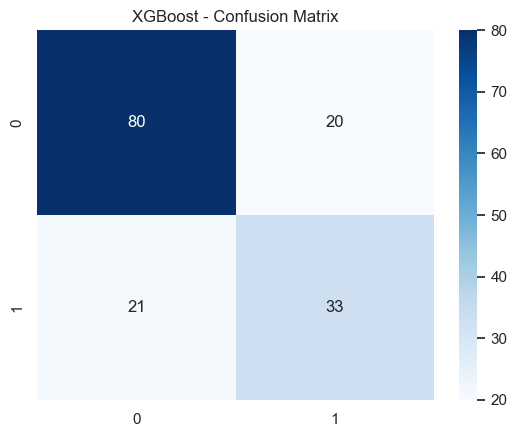


===== MODEL PERFORMANCE COMPARISON =====


,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.759740,0.673469,0.611111,0.640777
1,XGBoost,0.733766,0.622642,0.611111,0.616822


In [3]:
# ================================================================
# LGBM & XGBoost Classification on Diabetes Dataset.
# ================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

import xgboost as xgb
import lightgbm as lgb

sns.set(style="whitegrid")

# --------------------------------------------------------
# 1. LOAD DATA
# --------------------------------------------------------
df = pd.read_csv(r"C:\Users\abhin\Downloads\diabetes (3).csv")

print("Data Loaded Successfully!")
display(df.head())

print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# --------------------------------------------------------
# 2. BASIC EDA
# --------------------------------------------------------
plt.figure(figsize=(10,5))
sns.countplot(x=df.columns[-1], data=df)
plt.title("Target Class Distribution")
plt.show()

df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# --------------------------------------------------------
# 3. PREPROCESSING
# --------------------------------------------------------
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]

# scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------------------------------------
# 4. MODELS (No Warnings)
# --------------------------------------------------------

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# XGBoost (Clean version)
xgb_model = xgb.XGBClassifier(
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# --------------------------------------------------------
# 5. EVALUATION FUNCTION
# --------------------------------------------------------
def evaluate(model_name, y_true, y_pred):
    print(f"\n===== {model_name} =====")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# --------------------------------------------------------
# 6. RESULTS
# --------------------------------------------------------
evaluate("LightGBM", y_test, lgb_pred)
evaluate("XGBoost", y_test, xgb_pred)

# --------------------------------------------------------
# 7. COMPARISON TABLE
# --------------------------------------------------------
results = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, xgb_pred)
    ],
    "Precision": [
        precision_score(y_test, lgb_pred),
        precision_score(y_test, xgb_pred)
    ],
    "Recall": [
        recall_score(y_test, lgb_pred),
        recall_score(y_test, xgb_pred)
    ],
    "F1 Score": [
        f1_score(y_test, lgb_pred),
        f1_score(y_test, xgb_pred)
    ]
})

print("\n===== MODEL PERFORMANCE COMPARISON =====")
display(results)
